In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
def option_chains(ticker):
    """
    """
    asset = yf.Ticker(ticker)
    expirations = asset.options
    
    chains = pd.DataFrame()
    
    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)
        
        calls = opt.calls
        calls['optionType'] = "call"
        
        puts = opt.puts
        puts['optionType'] = "put"
        
        chain = pd.concat([calls, puts])
        chain['expiration'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)
        
        chains = pd.concat([chains, chain])
    
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days + 1
    
    return chains


In [25]:
ticker = "SPY"

spy_options_chain = option_chains(ticker)
calls = spy_options_chain[spy_options_chain["optionType"]=="call"]

expirations = set(calls.expiration)
print(sorted(expirations))

[Timestamp('2024-08-09 23:59:59'), Timestamp('2024-08-12 23:59:59'), Timestamp('2024-08-13 23:59:59'), Timestamp('2024-08-14 23:59:59'), Timestamp('2024-08-15 23:59:59'), Timestamp('2024-08-16 23:59:59'), Timestamp('2024-08-23 23:59:59'), Timestamp('2024-08-30 23:59:59'), Timestamp('2024-09-06 23:59:59'), Timestamp('2024-09-13 23:59:59'), Timestamp('2024-09-20 23:59:59'), Timestamp('2024-09-30 23:59:59'), Timestamp('2024-10-18 23:59:59'), Timestamp('2024-10-31 23:59:59'), Timestamp('2024-11-15 23:59:59'), Timestamp('2024-11-29 23:59:59'), Timestamp('2024-12-20 23:59:59'), Timestamp('2024-12-31 23:59:59'), Timestamp('2025-01-17 23:59:59'), Timestamp('2025-01-31 23:59:59'), Timestamp('2025-03-21 23:59:59'), Timestamp('2025-03-31 23:59:59'), Timestamp('2025-04-17 23:59:59'), Timestamp('2025-06-20 23:59:59'), Timestamp('2025-06-30 23:59:59'), Timestamp('2025-08-15 23:59:59'), Timestamp('2025-09-19 23:59:59'), Timestamp('2025-12-19 23:59:59'), Timestamp('2026-01-16 23:59:59'), Timestamp('20

Empty DataFrame
Columns: [contractSymbol, lastTradeDate, strike, lastPrice, bid, ask, change, percentChange, volume, openInterest, impliedVolatility, inTheMoney, contractSize, currency, optionType, expiration, daysToExpiration]
Index: []


[]

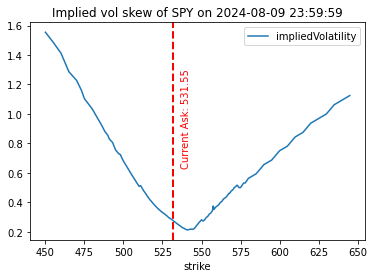

In [58]:
expiration_date = '2024-08-09 23:59:59'
oneDTE_calls = calls[calls['expiration'] == expiration_date]

# check to see if there are any cases of extreme outliers in implied vol
print(oneDTE_calls[oneDTE_calls["impliedVolatility"] < .1])

current_ask_price = yf.Ticker(ticker).info['ask']


#get 
ax = oneDTE_calls[['strike','impliedVolatility']].set_index('strike').plot(title=f"Implied vol skew of {ticker} on {expiration_date}")

#add in vertical line for previous market close price
ax.axvline(x=current_ask_price, color='red', linestyle='--', linewidth=2,)
ax.text(current_ask_price+5, ax.get_ylim()[1]*0.6, f'Current Ask: {current_ask_price}', 
        rotation=90, verticalalignment='center', horizontalalignment='left', color='red')
ax.plot()


In [57]:
yf.Ticker(ticker).info

{'longBusinessSummary': 'The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 518.66,
 'open': 523.91,
 'dayLow': 521.84,
 'dayHigh': 531.29,
 'regularMarketPreviousClose': 518.66,
 'regularMarketOpen': 523.91,
 'regularMarketDayLow': 521.84,
 'regularMarketDayHigh': 531.29,
 'trailingPE': 26.731218,
 'volume': 61815533,
 'regularMarketVolume': 61815533,
 'averageVolume': 51658004,
 'averageVolume10days': 72900640,
 'averageDailyVolume10Day': 72900640,
 'bid': 531.51,
 'ask': 531.55,
 'bidSize': 900,
 'askSize': 1100,
 'yield': 0.0124,
 'totalAssets': 562499813376,
 'fiftyTwoWeekLow': 409.21,
 'fiftyTwoWeekHigh': 565.16,
 'fiftyDayAverage': 543.0946,
 'twoHundredDayAverage': 501.34915,
 'trailingAnnualDividendRate': 5.662,
 '